# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('/Users/arka_bagchi/Desktop/Springboard/Frequentist Case Study/insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A: The mean charge is approximately $13,270.42, and the standard deviation is about $12,110.01. 

The histogram of charges shows that the majority of the charges are clustered towards the lower end, with fewer high charges. This suggests that most patients incur relatively lower medical expenses, with a few exceptions of very high charges.

The mean gives us an average charge across all patients. However, given the skewness of the data, the mean might be influenced by the few high charges.

The standard deviation is quite high relative to the mean, indicating a wide spread in the charges. This implies that there's a lot of variability in the charges, with some patients incurring significantly higher or lower costs than the average.

In summary, while the mean provides a central value for the charges, the high standard deviation and the skewed nature of the data suggest that the mean might not be the most representative statistic for this dataset. Median or other quantile measures might be more appropriate for understanding the central tendency of such skewed data.

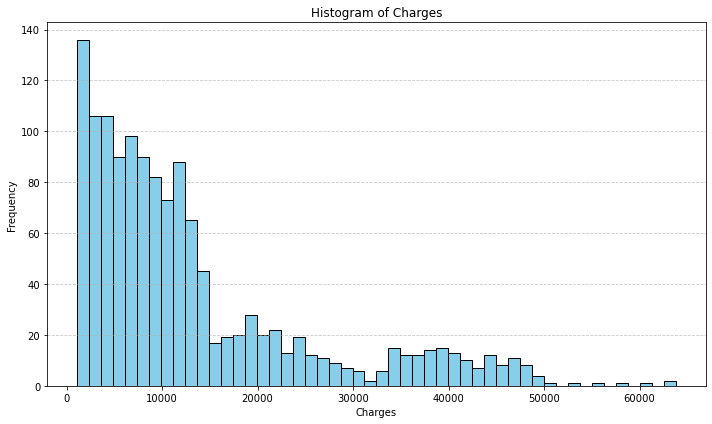

In [4]:
# Plotting the histogram of charges
plt.figure(figsize=(10, 6))
plt.hist(medical['charges'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [5]:
# Calculating the mean and standard deviation of charges
mean_charges = medical['charges'].mean()
std_charges = medical['charges'].std()

mean_charges, std_charges

(13270.422265141257, 12110.011236693994)

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A: To address the administrator's concern, the most appropriate frequentist test would be a one-sample t-test. Here's why:

As we're trying to determine if the average charge has fallen below $ 12,000, we're essentially comparing our sample mean to a known value ($12,000). Since we don't know the population standard deviation, we would use the sample standard deviation, which leads us to a t-test rather than a z-test. In this scenario, our null hypothesis (H0) would be that the average charge is $ 12,000, and our alternative hypothesis (HA) would be that the average charge is less than $12,000.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A: One-sided interval. The t critical value for a one-sided 95% confidence interval is approximately 1.646. 

In [6]:
# Given the administrator's concern, we should use a one-sided confidence interval as we are only interested
# in determining if the average charge has fallen below $12,000.

# Parameters for our calculations
sample_mean = mean_charges
sample_std = std_charges
n = len(medical)
alpha = 0.05  # For a 95% confidence interval

# Calculate the t critical value for a one-sided 95% confidence interval
t_critical = t.ppf(1 - alpha, df=n-1)

# Calculate the margin of error
margin_of_error = t_critical * (sample_std / np.sqrt(n))

# Calculate the one-sided 95% confidence interval for the mean
confidence_interval = (sample_mean - margin_of_error, np.inf)  # Since it's a one-sided interval

t_critical, confidence_interval


(1.6459941145571317, (12725.48718381623, inf))

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A: Null Hypothesis: The means of the two groups (people with insurance and people without insurance) are equal

Alternative hypothesis: The means of the two groups are not equal.

We are making the assumption that the variances of the two groups (populations) are equal. This is often referred to as the assumption of homogeneity of variances or homoscedasticity.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

Both the manual calculation and the function from scipy.stats yield the same t-statistic value of approximately 11.8933 The p-value is essentially zero for both methods, indicating extremely strong evidence against the null hypothesis.



In [7]:
# First, let's separate the charges for the two groups: insured and uninsured
insured = medical[medical['insuranceclaim'] == 1]['charges']
uninsured = medical[medical['insuranceclaim'] == 0]['charges']

# Sample sizes, means, and standard deviations for the two groups
n1, n2 = len(insured), len(uninsured)
mean1, mean2 = insured.mean(), uninsured.mean()
std1, std2 = insured.std(), uninsured.std()

In [8]:
# Manual Calculation

# Calculate the pooled standard deviation
sp = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))

# Calculate the t-test statistic
t_stat_manual = (mean1 - mean2) / (sp * np.sqrt(1/n1 + 1/n2))

# Calculate the degrees of freedom for the two-sample t-test
df = n1 + n2 - 2

# Calculate the p-value manually (two-tailed test)
p_value_manual = 2 * (1 - t.cdf(np.abs(t_stat_manual), df))

In [9]:
# Using scipy.stats function
from scipy.stats import ttest_ind

t_stat_scipy, p_value_scipy = ttest_ind(insured, uninsured)

In [10]:
t_stat_manual, p_value_manual, t_stat_scipy, p_value_scipy

(11.89329903087671, 0.0, 11.893299030876712, 4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ No. The reason for this is primarily historical and practical. T-tests, which account for unknown population variances using sample data, are more commonly used in practice when comparing means from two samples. Z-tests are more theoretical and are used when the population variances (or standard deviations) are known, which is rare in real-world applications.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test